# Improve distances from embedding evaluation using metric learning

Here we see the improvement metric learning brings in different plots.

## Get average distances without metric learning

### Load candidate resolver data and embedd data

In [1]:
import copy

import pandas as pd
import numpy as np

from src.candidate_resolver.embedding.BertEmbedder import BertEmbedder
from src.candidate_resolver.embedding.embedder_functions import EmbeddingFunctionProvider
from src.candidate_resolver.configurables.resolver_configurable_enums import EmbeddingType

2022-08-31 03:33:45.716626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-31 03:33:45.716672: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def read_initial_dataset_from(csv_file):
    return pd.read_csv(csv_file, sep=";", dtype="string")

In [3]:
data = read_initial_dataset_from("../../res/thesis_demonstration_set/training_examples")
data

,Lifted instance,DSL output
0,"Select [,column] [table]","SELECT([,column], [table])"
1,"Take [,column] [table]","SELECT([,column], [table])"
2,"Show [,column] [table]","SELECT([,column], [table])"
3,"Display [,column] [table]","SELECT([,column], [table])"
4,"Delete [,column] [table]","DELETE([,column], [table])"
5,"Remove [,column] [table]","DELETE([,column], [table])"
6,"Erase [,column] [table]","DELETE([,column], [table])"
7,"Add [,column] [table]","ADD([,column], [table])"
8,"Append [,column] [table]","ADD([,column], [table])"
9,Sort [condition],SORT([condition])


In [4]:
embedder = BertEmbedder.initialize("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", "https://tfhub.dev/tensorflow/bert_en_wwm_uncased_L-24_H-1024_A-16/4")
embedder_provider = EmbeddingFunctionProvider(embedder)

2022-08-31 03:33:51.162154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-31 03:33:51.162189: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-31 03:33:51.162225: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (WorkPad): /proc/driver/nvidia/version does not exist
2022-08-31 03:33:51.162581: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SEQUENCE)
bert_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.BERT_POOLED)
positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SEQUENCE_POSITIONAL)
max_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.MAX_POOLED)
avg_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.AVG_POOLED)
max_pooled_positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.MAX_POOLED_POSITIONAL)
avg_pooled_positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.AVG_POOLED_POSITIONAL)
summed_quadratic_kernel_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SUMMED_QUADRATIC_KERNEL_SEQUENCE)
summed_quadratic_kernel_bert_pooled_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SUMMED_QUADRATIC_KERNEL_BERT_POOLED)
summed_quadratic_kernel_positionally_encoded_sequence_embedder = embedder_provider\
    .select_embedding_function(EmbeddingType.SUMMED_QUADRATIC_KERNEL_SEQUENCE_POSITIONAL)

In [6]:
embedded_data = copy.deepcopy(data)
embedded_data["Sequence embedding"] = embedded_data["Lifted instance"]\
    .map(sequence_embedder)
embedded_data["Pooled embedding"] = embedded_data["Lifted instance"]\
    .map(bert_pooled_embedder)
embedded_data["Sequence embedding pos encoded"] = embedded_data["Lifted instance"]\
    .map(positionally_encoded_sequence_embedder)
embedded_data["Max pooled embedding without pos"] = embedded_data["Lifted instance"]\
    .map(max_pooled_embedder)
embedded_data["Avg pooled embedding without pos"] = embedded_data["Lifted instance"]\
    .map(avg_pooled_embedder)
embedded_data["Max pooled embedding with pos"] = embedded_data["Lifted instance"]\
    .map(max_pooled_positionally_encoded_sequence_embedder)
embedded_data["Avg pooled embedding with pos"] = embedded_data["Lifted instance"]\
    .map(avg_pooled_positionally_encoded_sequence_embedder)
embedded_data["Summed quadratic kernel sequence embedding"] = \
    embedded_data["Lifted instance"].map(summed_quadratic_kernel_sequence_embedder)
embedded_data["Summed quadratic kernel sequence embedding with pos"] = \
    embedded_data["Lifted instance"]\
        .map(summed_quadratic_kernel_positionally_encoded_sequence_embedder)
embedded_data["Summed quadratic kernel pooled embedding"] = \
    embedded_data["Lifted instance"].map(summed_quadratic_kernel_bert_pooled_embedder)

In [7]:
embedded_data

,Lifted instance,DSL output,Sequence embedding,Pooled embedding,Sequence embedding pos encoded,Max pooled embedding without pos,Avg pooled embedding without pos,Max pooled embedding with pos,Avg pooled embedding with pos,Summed quadratic kernel sequence embedding,Summed quadratic kernel sequence embedding with pos,Summed quadratic kernel pooled embedding
0,"Select [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.14310724, shape=(), dtype=float...","((tf.Tensor(0.9418908, shape=(), dtype=float32...","(((tf.Tensor(0.034067094, shape=(), dtype=floa...","((tf.Tensor(2.1302745, shape=(), dtype=float32...","((tf.Tensor(0.012326368, shape=(), dtype=float...","((tf.Tensor(1.7551742, shape=(), dtype=float32...","((tf.Tensor(0.01052791, shape=(), dtype=float3...","(tf.Tensor(3771445.5, shape=(), dtype=float32)...","(tf.Tensor(4503287.0, shape=(), dtype=float32)...","(tf.Tensor(667.6869, shape=(), dtype=float32),..."
1,"Take [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.12190775, shape=(), dtype=float...","((tf.Tensor(0.96598876, shape=(), dtype=float3...","(((tf.Tensor(-0.029208653, shape=(), dtype=flo...","((tf.Tensor(2.066711, shape=(), dtype=float32)...","((tf.Tensor(-0.0039919266, shape=(), dtype=flo...","((tf.Tensor(1.6850505, shape=(), dtype=float32...","((tf.Tensor(0.007907195, shape=(), dtype=float...","(tf.Tensor(3806474.2, shape=(), dtype=float32)...","(tf.Tensor(4520642.0, shape=(), dtype=float32)...","(tf.Tensor(699.78394, shape=(), dtype=float32)..."
2,"Show [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.103115246, shape=(), dtype=floa...","((tf.Tensor(0.9561712, shape=(), dtype=float32...","(((tf.Tensor(0.056016434, shape=(), dtype=floa...","((tf.Tensor(2.2714014, shape=(), dtype=float32...","((tf.Tensor(0.01551667, shape=(), dtype=float3...","((tf.Tensor(1.7946177, shape=(), dtype=float32...","((tf.Tensor(0.00991998, shape=(), dtype=float3...","(tf.Tensor(3782721.2, shape=(), dtype=float32)...","(tf.Tensor(4505320.0, shape=(), dtype=float32)...","(tf.Tensor(693.22455, shape=(), dtype=float32)..."
3,"Display [,column] [table]","SELECT([,column], [table])","(((tf.Tensor(0.057391074, shape=(), dtype=floa...","((tf.Tensor(0.9529922, shape=(), dtype=float32...","(((tf.Tensor(-0.10154182, shape=(), dtype=floa...","((tf.Tensor(2.0757697, shape=(), dtype=float32...","((tf.Tensor(0.0059459168, shape=(), dtype=floa...","((tf.Tensor(1.7831994, shape=(), dtype=float32...","((tf.Tensor(0.009194717, shape=(), dtype=float...","(tf.Tensor(3604980.2, shape=(), dtype=float32)...","(tf.Tensor(4607714.0, shape=(), dtype=float32)...","(tf.Tensor(683.04456, shape=(), dtype=float32)..."
4,"Delete [,column] [table]","DELETE([,column], [table])","(((tf.Tensor(0.18921447, shape=(), dtype=float...","((tf.Tensor(0.86055124, shape=(), dtype=float3...","(((tf.Tensor(-0.008709095, shape=(), dtype=flo...","((tf.Tensor(2.141731, shape=(), dtype=float32)...","((tf.Tensor(-0.019698715, shape=(), dtype=floa...","((tf.Tensor(1.5980524, shape=(), dtype=float32...","((tf.Tensor(0.0063043796, shape=(), dtype=floa...","(tf.Tensor(4233285.5, shape=(), dtype=float32)...","(tf.Tensor(5155118.0, shape=(), dtype=float32)...","(tf.Tensor(553.8817, shape=(), dtype=float32),..."
5,"Remove [,column] [table]","DELETE([,column], [table])","(((tf.Tensor(0.14014623, shape=(), dtype=float...","((tf.Tensor(0.9404374, shape=(), dtype=float32...","(((tf.Tensor(-0.11296028, shape=(), dtype=floa...","((tf.Tensor(1.9586687, shape=(), dtype=float32...","((tf.Tensor(-0.0032230911, shape=(), dtype=flo...","((tf.Tensor(1.7175667, shape=(), dtype=float32...","((tf.Tensor(0.00879555, shape=(), dtype=float3...","(tf.Tensor(3910499.0, shape=(), dtype=float32)...","(tf.Tensor(4532213.5, shape=(), dtype=float32)...","(tf.Tensor(654.95746, shape=(), dtype=float32)..."
6,"Erase [,column] [table]","DELETE([,column], [table])","(((tf.Tensor(0.1526022, shape=(), dtype=float3...","((tf.Tensor(0.9425419, shape=(), dtype=float32...","(((tf.Tensor(-0.

### Print distances

In [8]:
import itertools

from typing import List, Tuple
from src.candidate_resolver.scorers import euclidean_distance

In [9]:
def unpack_from(dataframe: pd.DataFrame, column: str):
    packed = dataframe[column].to_numpy()
    res = packed[0]
    for array in packed[1:]:
        res = np.vstack((res, array))

    return res

def make_labeled_pairs(dataframe: pd.DataFrame,
                       feature_column: str,
                       label_column: str,
                       unpack_feature_column: bool):
    features = unpack_from(dataframe, feature_column) if unpack_feature_column else dataframe[feature_column].to_numpy()
    labels = dataframe[label_column].to_numpy()
    return make_labeled_pairs_from(features, labels)

def make_labeled_pairs_from(features, labels):
    feature_pairs = []
    label_pairs = []
    for i, j in itertools.combinations(range(len(features)), 2):
        feature_pairs.append([features[i, :], features[j, :]])
        label_pairs.append([labels[i], labels[j]])
    return feature_pairs, label_pairs

In [10]:
def print_score_attributes_from_arrays(
        features: np.ndarray,
        labels: np.ndarray,
        feature_embedding_name: str,
        scorer):
    feature_pairs, label_pairs = make_labeled_pairs_from(features, labels)
    score_label_alignment = get_score_and_label_alignment(feature_pairs, label_pairs, scorer)
    print_attributes_of(score_label_alignment, feature_embedding_name)


def print_score_attributes_from_dataframe(
        data: pd.DataFrame,
        feature_column_name: str,
        label_column_name: str,
        scorer,
        unpack_features: bool = True):
    feature_pairs, label_pairs = make_labeled_pairs(
        data, feature_column_name, label_column_name, unpack_features
    )
    score_label_alignment = get_score_and_label_alignment(feature_pairs, label_pairs, scorer)
    print_attributes_of(score_label_alignment, feature_column_name)


def get_score_and_label_alignment(feature_pairs, label_pairs, scorer):
    res = []
    for i, label_pair in enumerate(label_pairs):
        score = scorer(feature_pairs[i][0], feature_pairs[i][1])
        res.append(
                (score, 1) if same_label_in(label_pair) else (score, 0)
            )
    return res


def same_label_in(label_pair):
    return label_pair[0] == label_pair[1]


def print_attributes_of(
        score_label_alignment: List[Tuple[float, int]],
        feature_embedding_name: str):
    same_label_scores = np.array([score for score, is_same_label in score_label_alignment if is_same_label == 1])
    not_same_label_scores = np.array([score for score, is_same_label in score_label_alignment if is_same_label == 0])
    same_min, same_max, same_avg, same_median = compute_min_max_avg_score(same_label_scores)
    not_same_min, not_same_max, not_same_avg, not_same_median = compute_min_max_avg_score(not_same_label_scores)
    same_text = f"Score attributes of the pairs with same label:\n" + \
                f"minimum score = {same_min}, maximum score = {same_max}\n" + \
                f"average score = {same_avg}, median score = {same_median}\n"
    not_same_text = f"Score attributes of the pairs with different labels:\n" + \
                    f"minimum score = {not_same_min}, maximum score = {not_same_max}\n" + \
                    f"average score = {not_same_avg}, median score = {not_same_median}\n"
    print(f"Score attributes over features with {feature_embedding_name}:")
    print(same_text)
    print(not_same_text)

def compute_min_max_avg_score(scores):
    return scores.min(), scores.max(), scores.mean(), np.median(scores)

In [11]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Sequence embedding", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Sequence embedding:
Score attributes of the pairs with same label:
minimum score = 32.002342224121094, maximum score = 101.48160552978516
average score = 58.41559982299805, median score = 48.220890045166016

Score attributes of the pairs with different labels:
minimum score = 37.06342697143555, maximum score = 115.10672760009766
average score = 79.658935546875, median score = 92.30856323242188



In [12]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Sequence embedding pos encoded", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Sequence embedding pos encoded:
Score attributes of the pairs with same label:
minimum score = 10.263010025024414, maximum score = 37.33660125732422
average score = 20.57228660583496, median score = 16.002878189086914

Score attributes of the pairs with different labels:
minimum score = 9.048336029052734, maximum score = 66.51458740234375
average score = 37.212738037109375, median score = 34.229827880859375



In [13]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Max pooled embedding without pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Max pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.4865953326225281, maximum score = 1.5294550657272339
average score = 1.1735258102416992, median score = 1.3221068382263184

Score attributes of the pairs with different labels:
minimum score = 0.7873364686965942, maximum score = 2.5499043464660645
average score = 1.5836554765701294, median score = 1.4816455841064453



In [14]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Avg pooled embedding without pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Avg pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.07380219548940659, maximum score = 0.17059531807899475
average score = 0.11653796583414078, median score = 0.11438216269016266

Score attributes of the pairs with different labels:
minimum score = 0.07428652048110962, maximum score = 0.23713357746601105
average score = 0.15358585119247437, median score = 0.13750091195106506



In [15]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Max pooled embedding with pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Max pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.45304372906684875, maximum score = 1.4540982246398926
average score = 0.8194578289985657, median score = 0.7348116636276245

Score attributes of the pairs with different labels:
minimum score = 0.5211110711097717, maximum score = 1.9534785747528076
average score = 1.0304439067840576, median score = 1.1485830545425415



In [16]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Avg pooled embedding with pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Avg pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.008081676438450813, maximum score = 0.02864867076277733
average score = 0.015412040054798126, median score = 0.011613896116614342

Score attributes of the pairs with different labels:
minimum score = 0.005697562359273434, maximum score = 0.1192072331905365
average score = 0.05071255937218666, median score = 0.027172069996595383



In [17]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Summed quadratic kernel sequence embedding", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Summed quadratic kernel sequence embedding:
Score attributes of the pairs with same label:
minimum score = 802371.8125, maximum score = 9366183.0
average score = 3916750.5, median score = 2408992.0

Score attributes of the pairs with different labels:
minimum score = 711380.9375, maximum score = 16903316.0
average score = 7476019.0, median score = 7833981.0



In [18]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Summed quadratic kernel sequence embedding with pos", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Summed quadratic kernel sequence embedding with pos:
Score attributes of the pairs with same label:
minimum score = 47187.73046875, maximum score = 5696659.5
average score = 1802036.75, median score = 323942.3125

Score attributes of the pairs with different labels:
minimum score = 81094.0234375, maximum score = 13879866.0
average score = 5925314.0, median score = 5578581.0



In [19]:
print_score_attributes_from_dataframe(
    embedded_data,
    "Summed quadratic kernel pooled embedding", "DSL output",
    euclidean_distance,
    unpack_features=True
)

Score attributes over features with Summed quadratic kernel pooled embedding:
Score attributes of the pairs with same label:
minimum score = 630.2290649414062, maximum score = 1971.070556640625
average score = 1246.500732421875, median score = 1230.172119140625

Score attributes of the pairs with different labels:
minimum score = 1000.7723999023438, maximum score = 4970.568359375
average score = 2818.295654296875, median score = 2473.450439453125



## Improve distances using neighborhood component analysis (NCA)

In [20]:
from metric_learn import NCA

In [21]:
def train_metric_learner_and_print_score_attributes(
        data: pd.DataFrame,
        training_feature_column_name: str,
        label_column_name : str,
        metric_learner,
        scorer):
    features = unpack_from(data, training_feature_column_name)
    labels = data[label_column_name]
    transformed_features = metric_learner.fit_transform(features, labels)
    print_score_attributes_from_arrays(
        transformed_features, labels, training_feature_column_name, scorer
    )
    return metric_learner

In [22]:
nca_bert_pooled = NCA(max_iter=1000)
nca_bert_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Pooled embedding", "DSL output",
    nca_bert_pooled,
    euclidean_distance
)

Score attributes over features with Pooled embedding:
Score attributes of the pairs with same label:
minimum score = 0.6339687757068668, maximum score = 5.507182155500172
average score = 2.448364303411073, median score = 2.21877707385904

Score attributes of the pairs with different labels:
minimum score = 2.4175779763136243, maximum score = 11.018578221027061
average score = 6.704774986288956, median score = 6.343633093254226



In [23]:
nca_max_pooled = NCA(max_iter=1000)
nca_max_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding without pos", "DSL output",
    nca_max_pooled,
    euclidean_distance
)

Score attributes over features with Max pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.7068706696742743, maximum score = 4.694161621734239
average score = 2.7532106613835063, median score = 2.757016248448196

Score attributes of the pairs with different labels:
minimum score = 2.1688312099073097, maximum score = 9.104475100189942
average score = 5.999507359589577, median score = 5.468127234124366



In [24]:
nca_avg_pooled = NCA(max_iter=1000)
nca_avg_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Avg pooled embedding without pos", "DSL output",
    nca_avg_pooled,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.8413714036268076, maximum score = 6.378848618401916
average score = 4.3560369892207, median score = 4.456447949607659

Score attributes of the pairs with different labels:
minimum score = 3.6931932395063134, maximum score = 44.50127464613477
average score = 19.895296758705523, median score = 8.92373885078661



In [25]:
nca_max_pooled_pos = NCA(max_iter=1000)
nca_max_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding with pos", "DSL output",
    nca_max_pooled_pos,
    euclidean_distance
)

Score attributes over features with Max pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 1.388795699551113, maximum score = 8.80384938533851
average score = 4.723644830568663, median score = 4.374026574759533

Score attributes of the pairs with different labels:
minimum score = 1.9715363354526387, maximum score = 21.095135705637475
average score = 11.618618262685093, median score = 9.168001339063132



In [26]:
nca_avg_pooled_pos = NCA(max_iter=1000)
nca_avg_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Avg pooled embedding with pos", "DSL output",
    nca_avg_pooled_pos,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.3355167738582091, maximum score = 15.477907152379172
average score = 2.8979991857820897, median score = 1.036909659143031

Score attributes of the pairs with different labels:
minimum score = 2.5555740313732183, maximum score = 95.37407245591581
average score = 36.98333179788644, median score = 13.165481097240852



## Improve distances using large margin nearest neighbor method (LMNN)

In [27]:
from metric_learn import LMNN

In [28]:
lmnn_bert_pooled = LMNN(k=1, learn_rate=1e-3)
lmnn_bert_pooled_embedding = train_metric_learner_and_print_score_attributes(
    embedded_data, "Pooled embedding", "DSL output",
    lmnn_bert_pooled,
    euclidean_distance
)

Score attributes over features with Pooled embedding:
Score attributes of the pairs with same label:
minimum score = 0.04160358345264398, maximum score = 0.25914203322046253
average score = 0.11994426394433114, median score = 0.10637975968784708

Score attributes of the pairs with different labels:
minimum score = 1.0426028169853492, maximum score = 3.089413080361719
average score = 1.9621558579711527, median score = 2.1029421994048128



In [29]:
lmnn_max_pooled = LMNN(k=1, learn_rate=1e-3)
lmnn_max_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding without pos", "DSL output",
    lmnn_max_pooled,
    euclidean_distance
)

Score attributes over features with Max pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.055775672478253734, maximum score = 0.5943589694206987
average score = 0.2834220081049853, median score = 0.2575972640675888

Score attributes of the pairs with different labels:
minimum score = 1.0135075877388073, maximum score = 2.426141274845197
average score = 1.48948439824362, median score = 1.1396893244959831



In [30]:
lmnn_avg_pooled = LMNN(k=1, learn_rate=1e-3)
lmnn_avg_pooled = train_metric_learner_and_print_score_attributes(
    embedded_data, "Avg pooled embedding without pos", "DSL output",
    lmnn_avg_pooled,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding without pos:
Score attributes of the pairs with same label:
minimum score = 0.04423926541308055, maximum score = 0.7002096008517251
average score = 0.32914404659806046, median score = 0.16778741234208572

Score attributes of the pairs with different labels:
minimum score = 1.0092234185506055, maximum score = 3.4217174937763324
average score = 1.686508562546555, median score = 1.408497532797752



In [31]:
lmnn_max_pooled_pos = LMNN(k=1, learn_rate=1e-3)
lmnn_max_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Max pooled embedding with pos", "DSL output",
    lmnn_max_pooled_pos,
    euclidean_distance
)

Score attributes over features with Max pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.18979920649209822, maximum score = 0.9048703876427465
average score = 0.4372691692883265, median score = 0.40876803437219067

Score attributes of the pairs with different labels:
minimum score = 1.0043919135060762, maximum score = 1.957921475322605
average score = 1.27322057288153, median score = 1.213504455432454



In [32]:
lmnn_avg_pooled_pos = LMNN(k=1, learn_rate=1e-3)
lmnn_avg_pooled_pos = train_metric_learner_and_print_score_attributes(
    embedded_data,
    "Avg pooled embedding with pos", "DSL output",
    lmnn_avg_pooled_pos,
    euclidean_distance
)

Score attributes over features with Avg pooled embedding with pos:
Score attributes of the pairs with same label:
minimum score = 0.008097741401727395, maximum score = 0.02909983943685733
average score = 0.015545238387164715, median score = 0.011626128972037172

Score attributes of the pairs with different labels:
minimum score = 0.005697761717579199, maximum score = 0.12203543182879012
average score = 0.051790791037344894, median score = 0.02762610523764122



## Plotting the improved data points

In [33]:
from src.plotting.plots import create_three_dimensional_scatter_of

In [34]:
embedded_data["nca bert pooled"] = embedded_data["Pooled embedding"].map(nca_bert_pooled.transform)
embedded_data["nca max pooled"] = embedded_data["Max pooled embedding without pos"].map(nca_max_pooled.transform)
embedded_data["nca avg pooled"] = embedded_data["Avg pooled embedding without pos"].map(nca_avg_pooled.transform)
embedded_data["nca max pooled pos"] = embedded_data["Max pooled embedding with pos"].map(nca_max_pooled_pos.transform)
embedded_data["nca avg pooled pos"] = embedded_data["Avg pooled embedding with pos"].map(nca_avg_pooled_pos.transform)
embedded_data["lmnn bert pooled"] = embedded_data["Pooled embedding"].map(lmnn_bert_pooled.transform)
embedded_data["lmnn max pooled"] = embedded_data["Max pooled embedding without pos"].map(lmnn_max_pooled.transform)
embedded_data["lmnn avg pooled"] = embedded_data["Avg pooled embedding without pos"].map(lmnn_avg_pooled.transform)
embedded_data["lmnn max pooled pos"] = embedded_data["Max pooled embedding with pos"].map(lmnn_max_pooled_pos.transform)
embedded_data["lmnn avg pooled pos"] = embedded_data["Avg pooled embedding with pos"].map(lmnn_avg_pooled_pos.transform)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


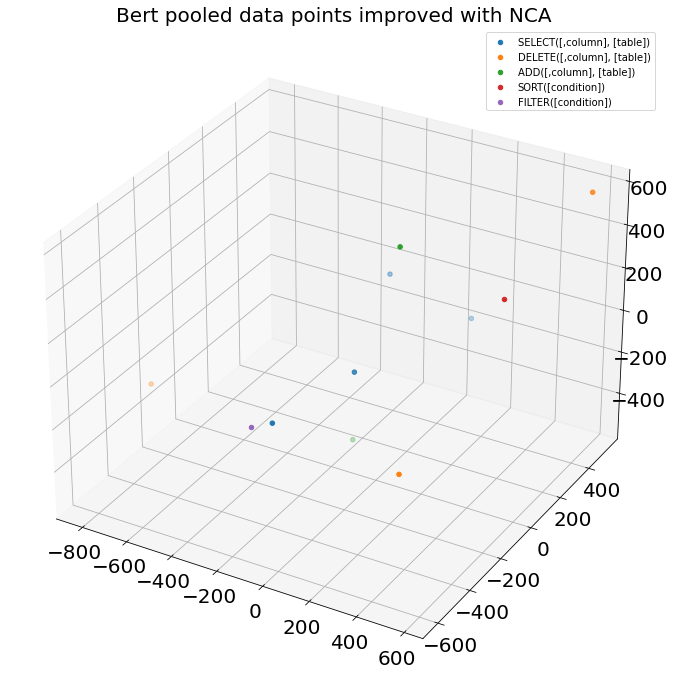

In [35]:
create_three_dimensional_scatter_of(
    "nca_bert_pooled_scatter",
    embedded_data, "nca bert pooled", "DSL output",
    "Bert pooled data points improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


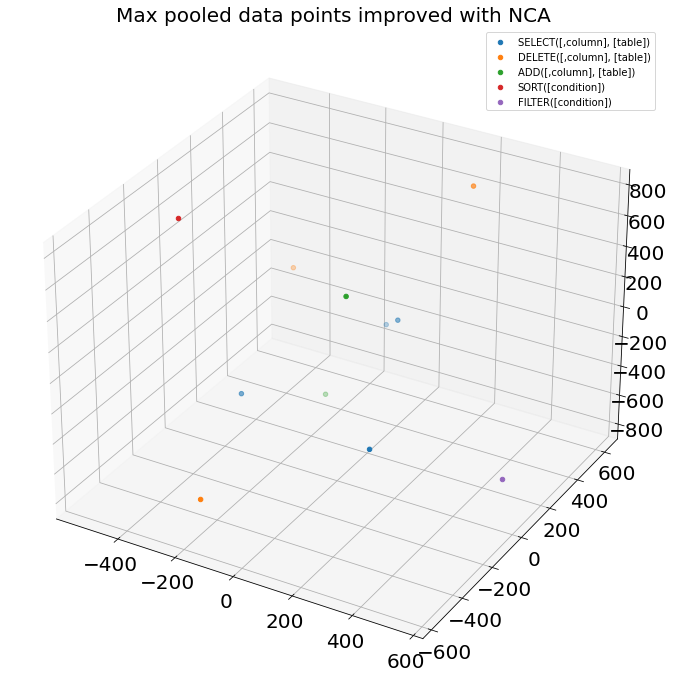

In [36]:
create_three_dimensional_scatter_of(
    "nca_max_pooled_scatter",
    embedded_data, "nca max pooled", "DSL output",
    "Max pooled data points improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


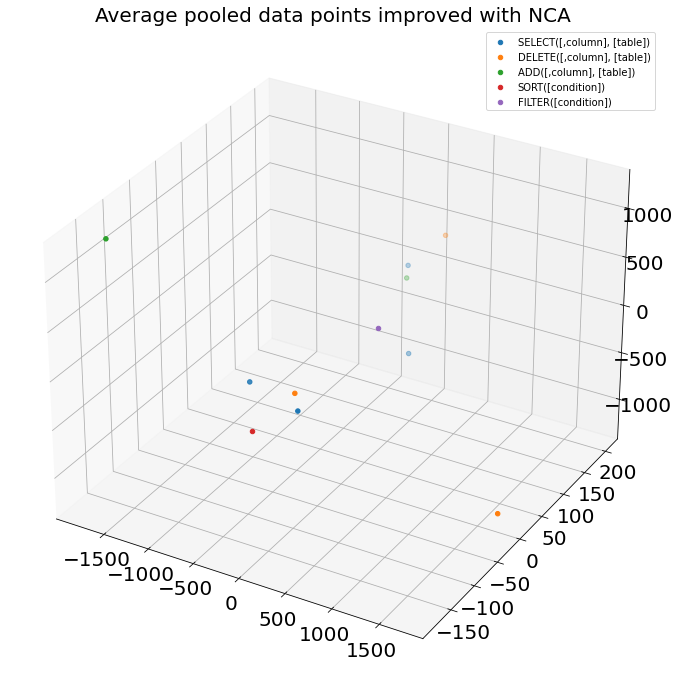

In [37]:
create_three_dimensional_scatter_of(
    "nca_avg_pooled_scatter",
    embedded_data, "nca avg pooled", "DSL output",
    "Average pooled data points improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


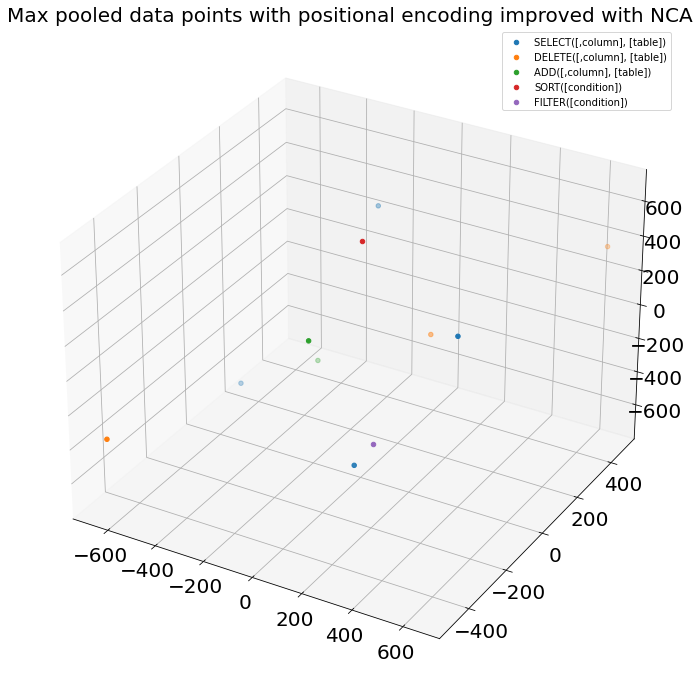

In [38]:
create_three_dimensional_scatter_of(
    "nca_max_pooled_pos_scatter",
    embedded_data, "nca max pooled pos", "DSL output",
    "Max pooled data points with positional encoding improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


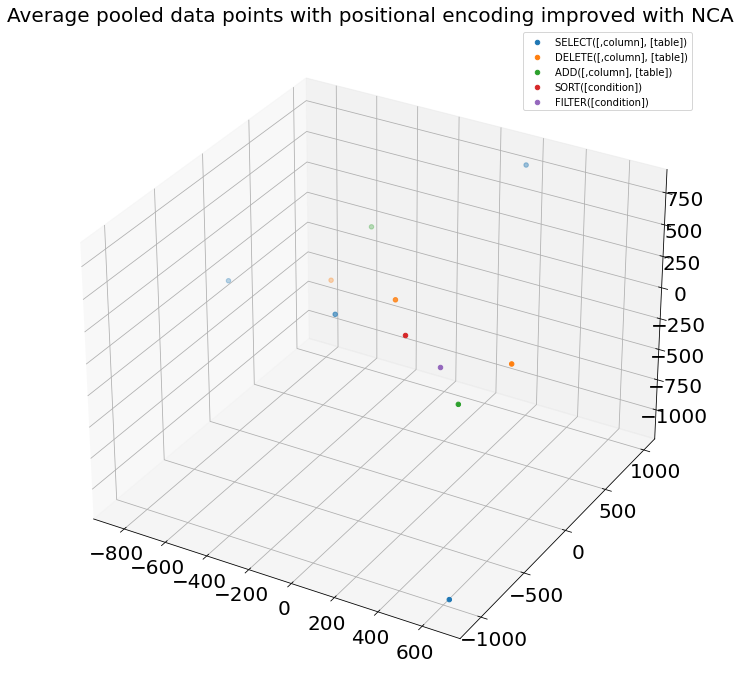

In [39]:
create_three_dimensional_scatter_of(
    "nca_avg_pooled_pos_scatter",
    embedded_data, "nca avg pooled pos", "DSL output",
    "Average pooled data points with positional encoding improved with NCA"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


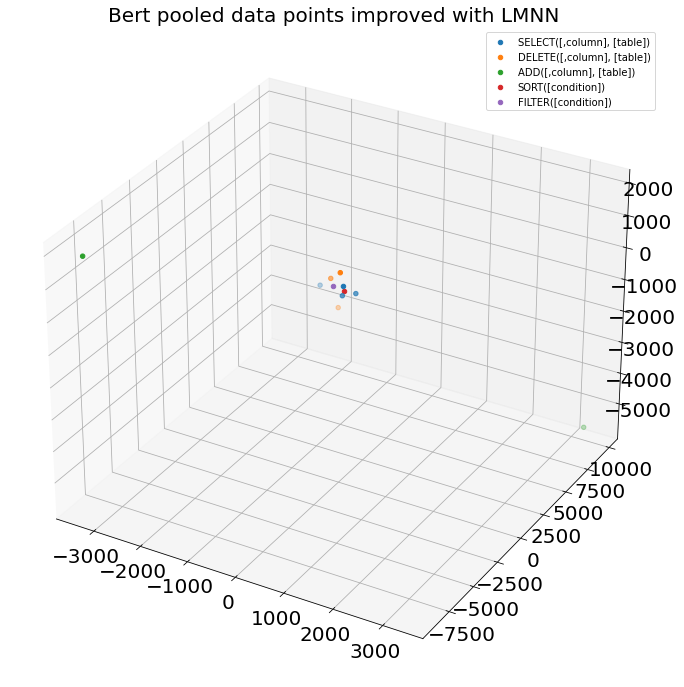

In [40]:
create_three_dimensional_scatter_of(
    "lmnn_bert_pooled_scatter",
    embedded_data, "lmnn bert pooled", "DSL output",
    "Bert pooled data points improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


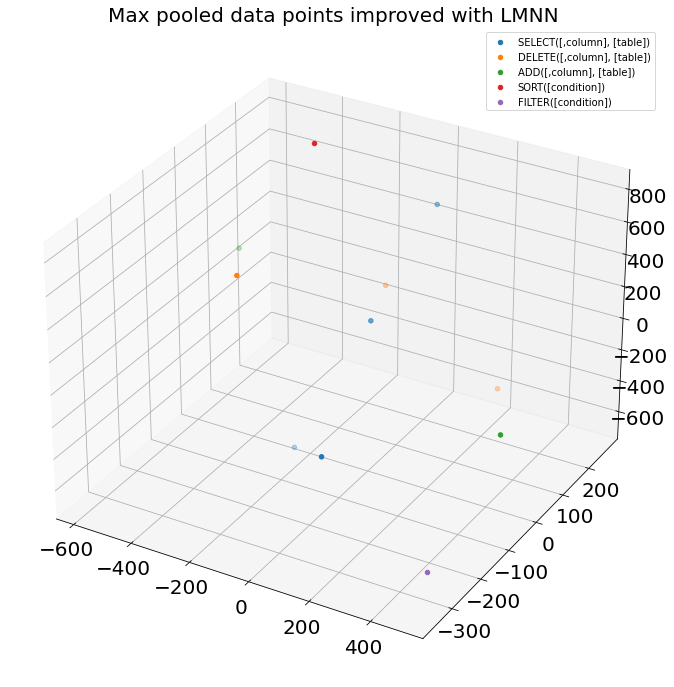

In [41]:
create_three_dimensional_scatter_of(
    "lmnn_max_pooled_scatter",
    embedded_data, "lmnn max pooled", "DSL output",
    "Max pooled data points improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


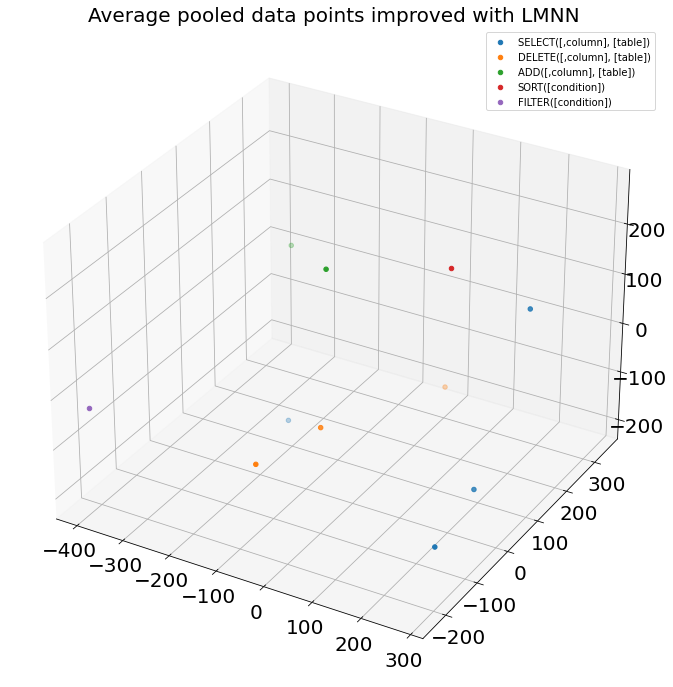

In [42]:
create_three_dimensional_scatter_of(
    "lmnn_avg_pooled_scatter",
    embedded_data, "lmnn avg pooled", "DSL output",
    "Average pooled data points improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


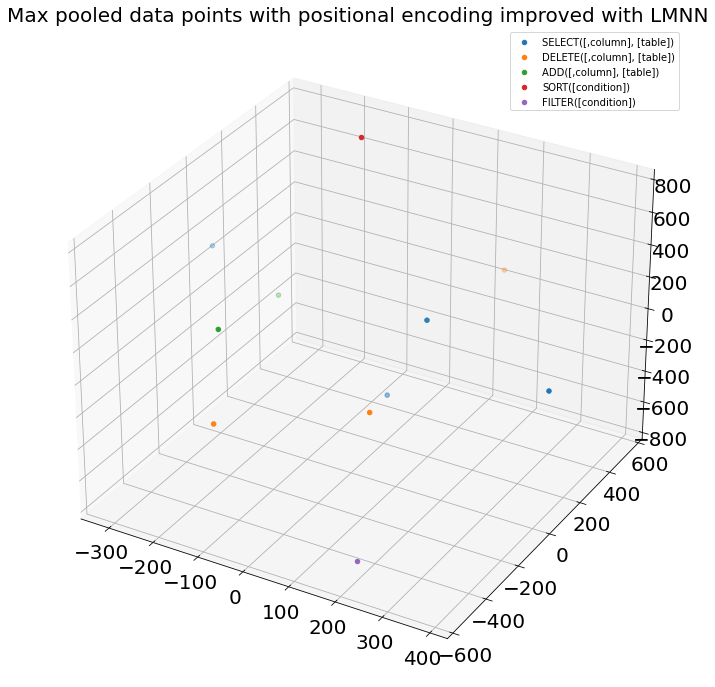

In [43]:
create_three_dimensional_scatter_of(
    "lmnn_max_pooled_pos_scatter",
    embedded_data, "lmnn max pooled pos", "DSL output",
    "Max pooled data points with positional encoding improved with LMNN"
)

/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/pandavid/PycharmProjects/EfficientParsing/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


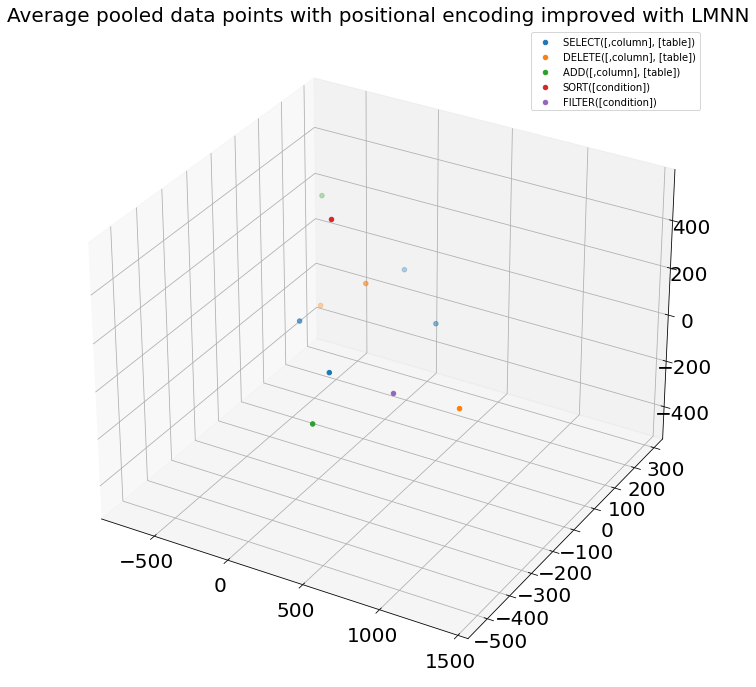

In [44]:
create_three_dimensional_scatter_of(
    "lmnn_avg_pooled_pos_scatter",
    embedded_data, "lmnn avg pooled pos", "DSL output",
    "Average pooled data points with positional encoding improved with LMNN"
)

## Histplot of distances between vectors in data set

In [45]:
from src.plotting.plots import create_distance_histplot

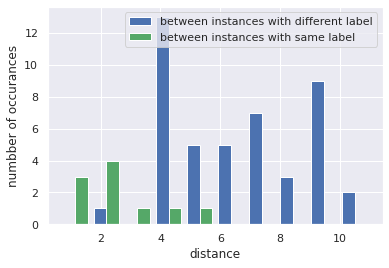

In [46]:
create_distance_histplot(
    "nca_bert_pooled_distance_histogram",
    embedded_data, "nca bert pooled",
    "DSL output", euclidean_distance
)

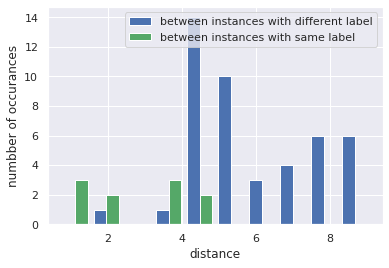

In [47]:
create_distance_histplot(
    "nca_max_pooled_distance_histogram",
    embedded_data, "nca max pooled",
    "DSL output", euclidean_distance
)

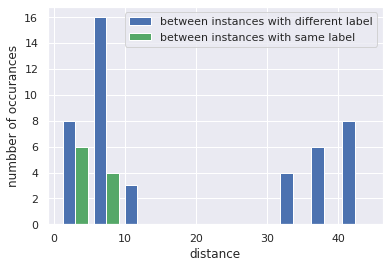

In [48]:
create_distance_histplot(
    "nca_avg_pooled_distance_histogram",
    embedded_data, "nca avg pooled",
    "DSL output", euclidean_distance
)

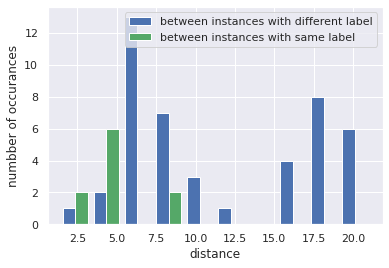

In [49]:
create_distance_histplot(
    "nca_max_pooled_pos_distance_histogram",
    embedded_data, "nca max pooled pos",
    "DSL output", euclidean_distance
)

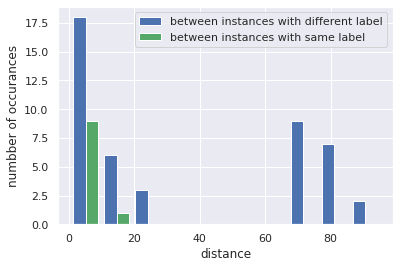

In [50]:
create_distance_histplot(
    "nca_avg_pooled_pos_distance_histogram",
    embedded_data, "nca avg pooled pos",
    "DSL output", euclidean_distance
)

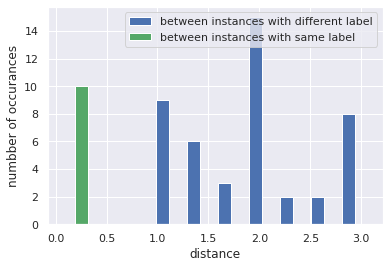

In [51]:
create_distance_histplot(
    "lmnn_bert_pooled_distance_histogram",
    embedded_data, "lmnn bert pooled",
    "DSL output", euclidean_distance
)

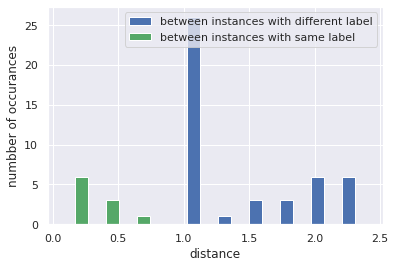

In [52]:
create_distance_histplot(
    "lmnn_max_pooled_distance_histogram",
    embedded_data, "lmnn max pooled",
    "DSL output", euclidean_distance,
)

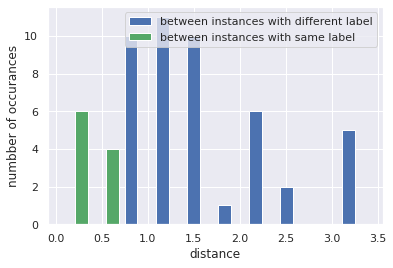

In [53]:
create_distance_histplot(
    "lmnn_avg_pooled_distance_histogram",
    embedded_data, "lmnn avg pooled",
    "DSL output", euclidean_distance
)

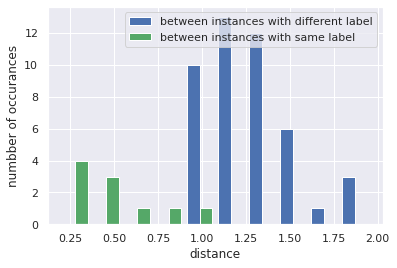

In [54]:
create_distance_histplot(
    "lmnn_max_pooled_pos_distance_histogram",
    embedded_data, "lmnn max pooled pos",
    "DSL output", euclidean_distance
)

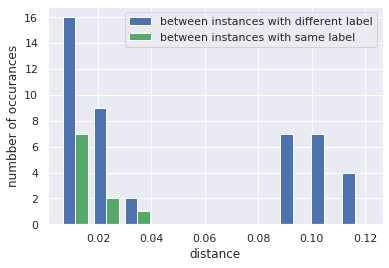

In [55]:
create_distance_histplot(
    "lmnn_avg_pooled_pos_distance_histogram",
    embedded_data, "lmnn avg pooled pos",
    "DSL output", euclidean_distance
)